<a href="https://colab.research.google.com/github/Akshhxt/TensorFlow/blob/main/Neural_Network_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introdution to Neural Network Classification in TensorFlow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

#A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Visualizing our Data

In [6]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:

# Check out the different labels
circles.label.value_counts()


1    500
0    500
Name: label, dtype: int64

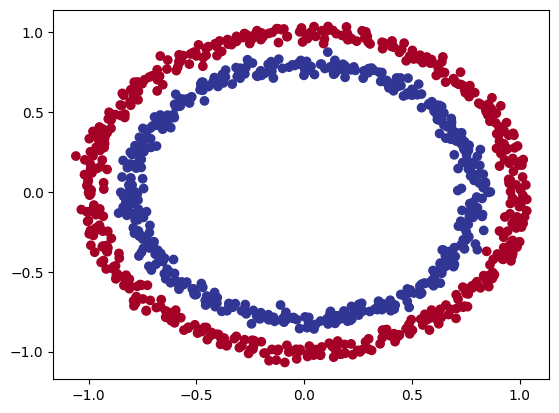

In [8]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [9]:
# Check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# How many samples are we working on?
len(X), len(y)

(1000, 1000)

In [11]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
* 1. Creating a model
* 2. Compiling the model
* 3. Fitting the model
* 4. Evaluate the model

In [12]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model

model_1.fit(X, y, epochs=200, verbose=0)

# 4. Evaluate the model

model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 6.7406 - accuracy: 0.5330


[6.740645408630371, 0.5329999923706055]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=200, verbose=0) # set verbose=0 to make the output print less


# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

## Improving the model

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0) # fit for 100 passes of the data

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4950


[0.6935147643089294, 0.4950000047683716]

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation


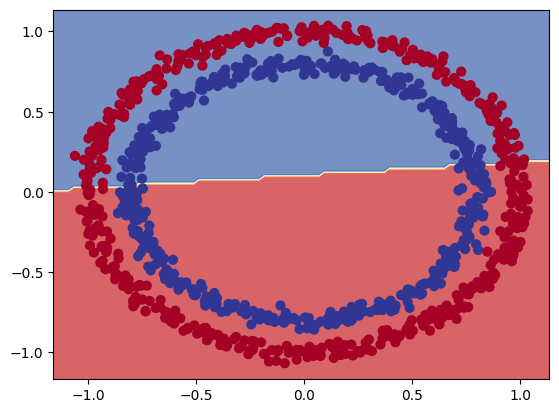

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [17]:
import numpy as np
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)

# Generate some sample regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split the data into train and test sets
X_reg_train = X_regression[:150].reshape(-1, 1)  # Reshape to make it 2D
X_reg_test = X_regression[150:].reshape(-1, 1)
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Import Sequential and Dense from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model_3 = Sequential([
    Dense(64, input_shape=(1,), activation='relu'),  # Input shape is 1D
    Dense(1)  # Output layer for regression
])

# Compile the model
model_3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_3.fit(X_reg_train, y_reg_train, epochs=100, verbose=1)


Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 188914.2344
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 173178.6094
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 159105.0156
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 145280.2344
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 131936.8125
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 118921.7188
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 106777.0703
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 95852.8672
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 85857.1484
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 76098.5703
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 67005.4141
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 58595.3477
Epoch 

In [18]:
model_3.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 11ms/step - loss: 509.5365 - mae: 509.5365
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 414.5393 - mae: 414.5393
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 336.1523 - mae: 336.1523
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 282.8065 - mae: 282.8065
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 260.9116 - mae: 260.9116
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 257.4967 - mae: 257.4967
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 257.4126 - mae: 257.4126
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 257.0063 - mae: 257.0063
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 262.4003 - mae: 262.4003
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 257.2921 - mae: 257.2921
Epoch 11/100
5/5 [====================

2/2 [==============================] - 0s 6ms/step


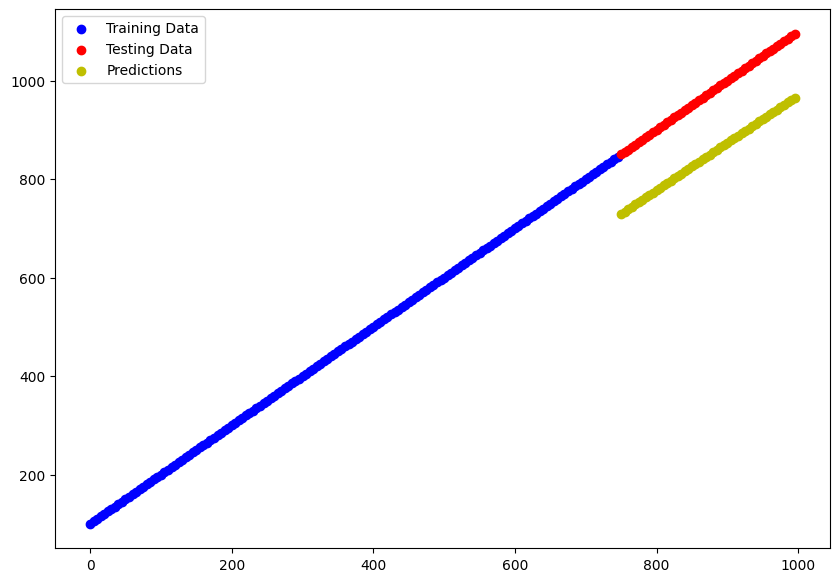

In [20]:
y_reg_preds = model_3.predict(X_reg_test)
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training Data')
plt.scatter(X_reg_test, y_reg_test, c='r', label='Testing Data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='y', label='Predictions')
plt.legend();

The missing piece: Non-linearity

In [21]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 6.0231 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0051 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9813 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9379 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9221 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9073 - accuracy: 0.4790
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8733 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8361 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8182 - accuracy: 0.4770
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8148 - accuracy: 0.4770
Epoch 11/

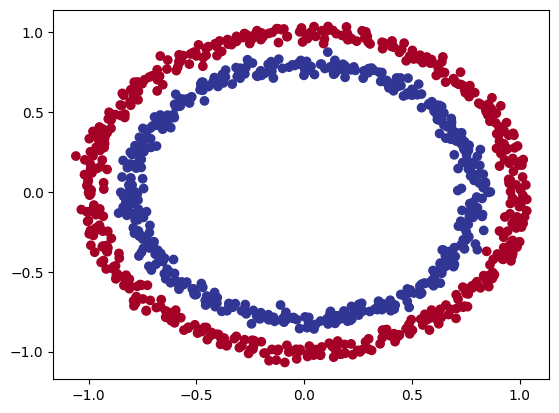

In [22]:
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation


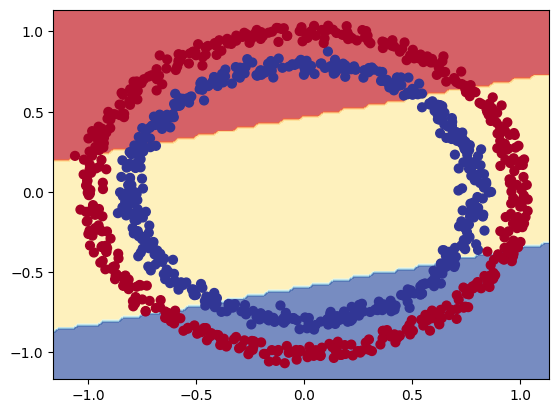

In [23]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

## Building the neural network with a non-linear function

In [24]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),

])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.2291 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2150 - accuracy: 0.4900
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2126 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2111 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1911 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1643 - accuracy: 0.4910
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1613 - accuracy: 0.4920
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1597 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1587 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1491 - accuracy: 0.4910
Epoch 11/

Upgrading our non-linear model with more layers

In [25]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [26]:

# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation


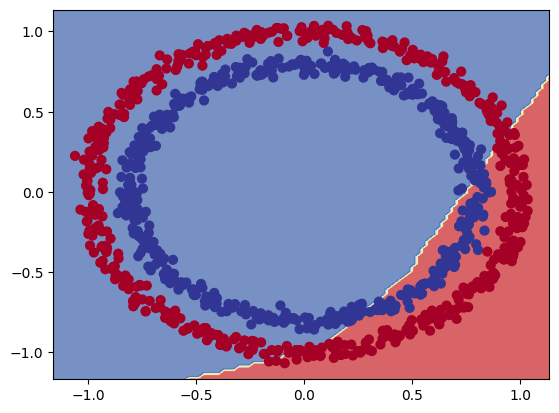

In [27]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? For binary classification, the output layer activation is usually the Sigmoid activation function.

In [28]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)


In [29]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.9640


[0.3031253516674042, 0.9639999866485596]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation


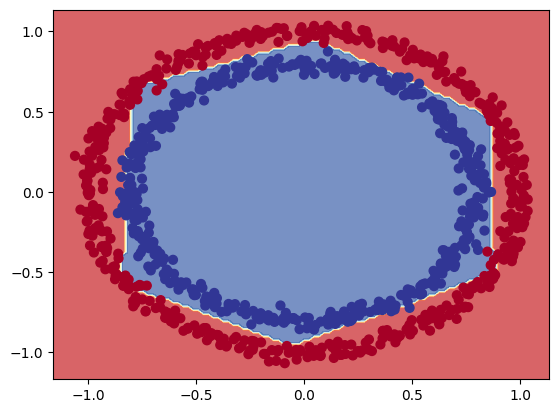

In [30]:
# View the predictions of the model with relu and sigmoid activations
plot_decision_boundary(model_7, X, y)

In [31]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

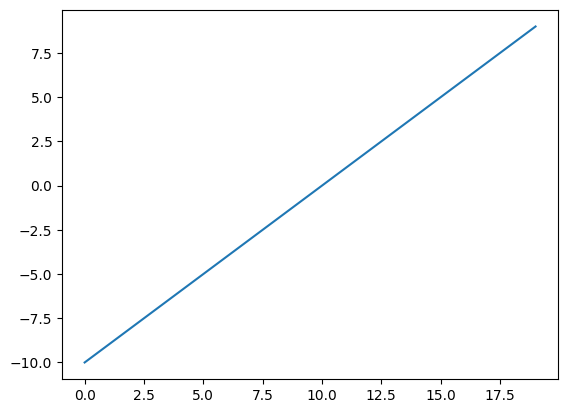

In [32]:
# Visualize our toy tensor
plt.plot(A);

In [33]:
# Sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

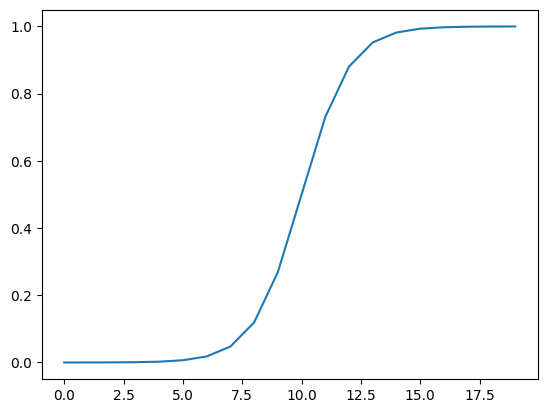

In [34]:
plt.plot(sigmoid(A));

In [35]:
# ReLU
def relu(x):
  return tf.maximum(0, x)
# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

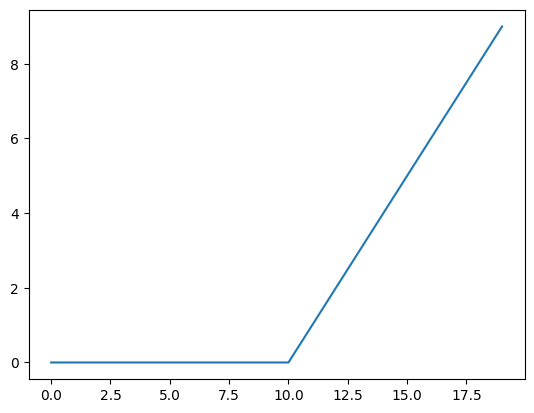

In [36]:
plt.plot(relu(A))

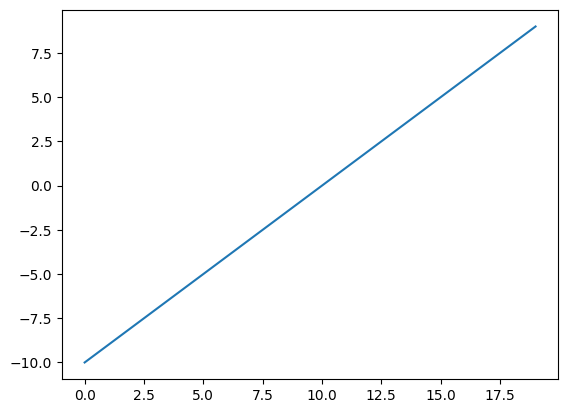

In [37]:
# Linear
plt.plot(tf.keras.activations.linear(A));

In [38]:
# How many examples are in the whole dataset?
len(X)

1000

In [39]:

# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [40]:
tf.random.set_seed(42)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
history = model_8.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 2s 6ms/step - loss: 0.6929 - accuracy: 0.4963
Epoch 2/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6845 - accuracy: 0.5713
Epoch 3/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6776 - accuracy: 0.5925
Epoch 4/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6693 - accuracy: 0.6463
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6586 - accuracy: 0.6350
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6426 - accuracy: 0.6662
Epoch 7/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6203 - accuracy: 0.7613
Epoch 8/25
25/25 [==============================] - 0s 5ms/step - loss: 0.5943 - accuracy: 0.7937
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.5524 - accuracy: 0.8875
Epoch 10/25
25/25 [==============================] - 0s 5ms/step - loss: 0.4868 - accuracy: 0.9325
Epoch 11/25
25/25 [

In [41]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 9ms/step - loss: 0.0570 - accuracy: 0.9950
Model loss on the test set: 0.056999173015356064
Model accuracy on the test set: 99.50%


313/313 [==============================] - 2s 5ms/step
doing binary classifcation


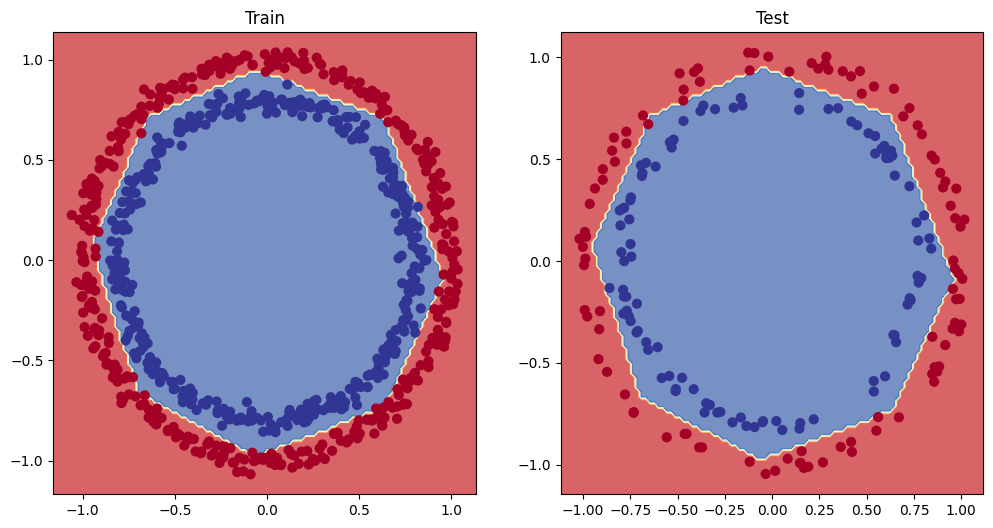

In [42]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [43]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.692891,0.49625
1,0.684525,0.57125
2,0.677554,0.59250
3,0.669280,0.64625
4,0.658636,0.63500
5,0.642581,0.66625
6,0.620262,0.76125
7,0.594295,0.79375
8,0.552374,0.88750
9,0.486828,0.93250


from matplotlib import pyplot as plt
_df_0['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='loss', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0.5, 1.0, 'Model_8 training curves')

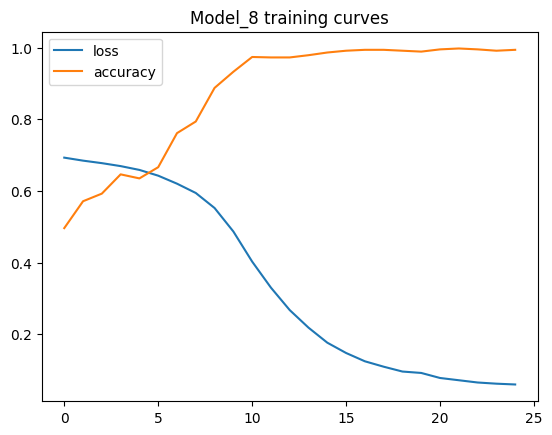

In [45]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")